In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п.1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
#Ищем коэффициенты линейной регрессии с помощью формул для парной регрессии,
b1 = ((salary * scoring).mean() - salary.mean() * scoring.mean()) / ((salary ** 2).mean() - salary.mean() ** 2)
print(b1)
b0 = scoring.mean() - b1 * salary.mean()
print(b0)

2.620538882402765
444.1773573243596


In [69]:
#Найдем коэффициены линейной регрессии при помощи метода наименьших квадратоа, для этого:
#Переворачиваем матрици (строка становится столбцом)
salary = salary.reshape(-1, 1)
scoring = scoring.reshape(-1, 1)
#Присоединяем к матрице зарплат единичную матрицу
ones = np.ones((salary.shape[0], 1))
salary = np.hstack((ones, salary))

In [60]:
salary

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [61]:
XTX = salary.T.dot(salary)

np.linalg.det(XTX)

349464.00000000023

In [62]:
XTX

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

In [63]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary.T).dot(scoring)

print(b)

[[444.17735732]
 [  2.62053888]]


При использовании обоих методов результат получился примерно одинаковый.

Модель регресси: scoring = 444.177 + 2.62  * salary

Text(0, 0.5, 'Скоринг')

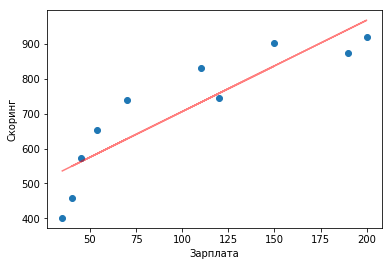

In [78]:
#Построим график получившегося уравнения линейной регрессии
#и отметим на графике точки соответствующие исходным данным
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Зарплата')
plt.ylabel('Скоринг')

Построим матрицу z1 которая пудет соответствовать значениям скоринга посчитанным по полученному уравнению линейной регрессии

In [80]:
z1 = b0 + b1 * salary

На основе полученной матрицы и реальных значений скоринга получим значение детерминации

In [81]:
R1 = z1.var() / scoring.var()
R1

0.7876386635293678

Посчитаем среднюю ошибку апроксимации

In [83]:
A = np.abs((scoring - z1) / scoring).mean()
A

0.11469251843561709

In [84]:
k1 = 1
k2 = len(salary) - 1 - 1

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [85]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T1 > F_crit, следовательно уравнение линейной регрессии признается статистически значимым

In [86]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
)
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [87]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
)
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [88]:
s_slope = standard_error_slope(salary, scoring, z1)
s_slope

0.48108279568516005

In [89]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=10)
t

2.2281388519649385

In [90]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5486196143247493, 3.6924581504807805)

In [91]:
s_intercept = standard_error_intercept(salary, scoring, z1)
s_intercept

56.46649755068153

In [92]:
#Доверительный интервал
(b0 - t * s_intercept, b0 + t * s_intercept)

(318.36216029730303, 569.9925543514162)

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [102]:
y1 = scoring[:5]
y2 = scoring[5:10]
print(y1, y2)

[401 574 874 919 459] [739 653 902 746 832]


In [103]:
n1 = y1.shape[0]
n2 = y2.shape[0]

In [105]:
#Среднее по первому значению критерия
y1_mean = y1.mean()
#Среднее по второму значению критерия
y2_mean = y2.mean()
#Общее среднее
scoring_mean  = scoring.mean()
print(y1_mean, y2_mean, scoring_mean)

645.4 774.4 709.9


In [114]:
#Найдем сумму квадратов отклонений средних групповых значений от общего среднего значения
S2_F = n1 * (y1_mean - scoring_mean) ** 2 + n2 * (y2_mean - scoring_mean) ** 2
# и остаточную сумму квадратов отклонений
S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_F, S2_res

(41602.5, 263086.39999999997)

In [123]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k
#Оценки дисперсии
sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(41602.5, 32885.799999999996)

In [124]:
#Значение статистики
T = sigma2_F / sigma2_res
T

1.2650596914169643

In [125]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T < F_crit следовательно город проживание не является статистически значимым для вычисления размера кредитного скоринга

Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [126]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


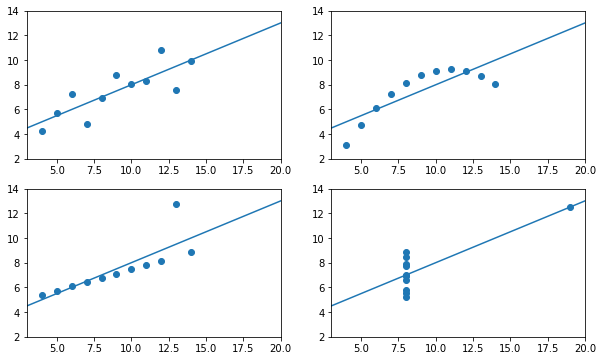

In [130]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ox = np.linspace(3, 20, 10**4)

for i, ax in enumerate(axes.flatten()):
    i += 1
    
    x_key = f'x{i}'
    y_key = f'y{i}'
    
    x = anscombe_dataset[x_key]
    y = anscombe_dataset[y_key]
    
    b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
    b0 = y.mean() - b1 * x.mean()
    oy = b0 + b1 * ox
    ax.scatter(x, y)
    ax.plot(ox, oy)
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)